cascaded system performance

In [125]:
haswell_12=[2.17,1.3,0.88]
skylake_12=[1.2,0.88,0.65]
skylake_8=[1.225,1.0,0.8]
skylake_4=[1.35,1.3,1.25]

In [126]:
import matplotlib.pyplot as plt
import numpy as np

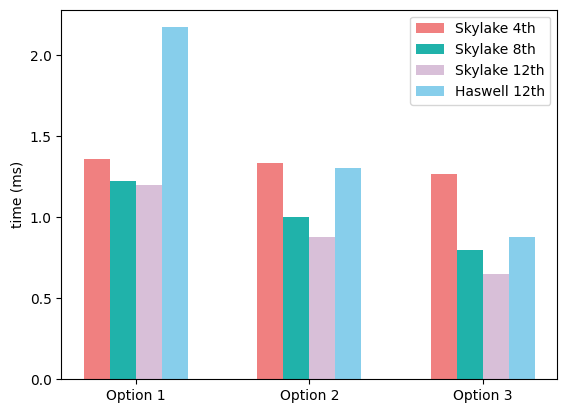

In [127]:
width = 0.15
N = 3
ind = np.arange(N)
skylake_4 = [1.355,1.335,1.268]
bar1 = plt.bar(ind,skylake_4,width,color='lightcoral')

skylake_8=[1.225,1.0,0.8]
bar2 = plt.bar(ind+width,skylake_8,width,color='lightseagreen')

skylake_12=[1.2,0.88,0.65]
bar3 = plt.bar(ind+width*2,skylake_12,width,color='thistle')

haswell_12=[2.17,1.3,0.88]
bar4 = plt.bar(ind+width*3,haswell_12,width,color='skyblue')

# plt.xlabel("Option")
plt.ylabel('time (ms)')
plt.xticks(ind + width*1.5, ['Option 1','Option 2','Option 3'])

plt.legend([bar1,bar2,bar3,bar4], ['Skylake 4th','Skylake 8th','Skylake 12th','Haswell 12th'])
plt.show()

Rounding error issue

In [128]:
import numpy as np
import math 
import matplotlib.pyplot as plt

In [129]:
# designed poles
poles = np.array([(6+math.sqrt(11)*1j)/7,(6-math.sqrt(11)*1j)/7,\
                (10+math.sqrt(17)*1j)/11,(10-math.sqrt(17)*1j)/11,\
                (8+math.sqrt(13)*1j)/9,(8-math.sqrt(13)*1j)/9,\
                0.95,0.85,\
                (0.5+math.sqrt(0.8)*1j)/13,(0.5-math.sqrt(0.8)*1j)/13,\
                (6+2j)/7,(6-2j)/7],\
               dtype='F')
poles

array([0.85714287+0.47380355j, 0.85714287-0.47380355j,
       0.90909094+0.37482777j, 0.90909094-0.37482777j,
       0.8888889 +0.4006168j , 0.8888889 -0.4006168j ,
       0.95      +0.j        , 0.85      +0.j        ,
       0.03846154+0.06880209j, 0.03846154-0.06880209j,
       0.85714287+0.2857143j , 0.85714287-0.2857143j ], dtype=complex64)

In [130]:
L=12

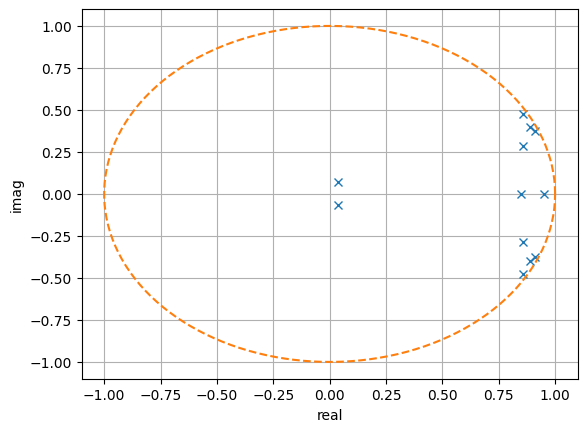

In [131]:
angle = np.linspace(0,2*np.pi,150) 
x_circ = np.cos(angle)
y_circ = np.sin(angle) 

plt.plot(poles.real,poles.imag,'x')
plt.plot(x_circ,y_circ,'--')
plt.ylabel('imag')
plt.xlabel('real')
# plt.title('Poles of 12th order IIR')
plt.grid()
plt.show()

In [132]:
# direct form of recursive equation
coeffs1 = np.polynomial.polynomial.polyfromroots(poles)
coeffs1 = coeffs1[::-1]
coeffs1 = np.float32(coeffs1.real) # change to float64 will be the same as cascaded form
coeffs1

array([ 1.0000000e+00, -8.9014540e+00,  3.6329853e+01, -8.9517014e+01,
        1.4753873e+02, -1.7018135e+02,  1.3952071e+02, -8.0754387e+01,
        3.2016319e+01, -8.1575336e+00,  1.1828587e+00, -8.0334730e-02,
        3.6109132e-03], dtype=float32)

In [133]:
poles1=np.roots(coeffs1)
poles1

array([0.87726104+0.486131j  , 0.87726104-0.486131j  ,
       0.9736368 +0.37091133j, 0.9736368 -0.37091133j,
       0.82657945+0.42468086j, 0.82657945-0.42468086j,
       0.82577544+0.26378152j, 0.82577544-0.26378152j,
       0.9876101 +0.j        , 0.8304153 +0.j        ,
       0.03846154+0.06880208j, 0.03846154-0.06880208j], dtype=complex64)

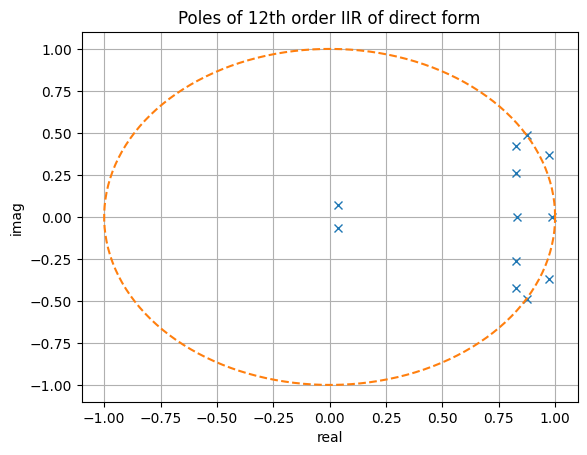

In [134]:
angle = np.linspace(0,2*np.pi,150) 
x_circ = np.cos(angle)
y_circ = np.sin(angle) 

plt.plot(poles1.real,poles1.imag,'x')
plt.plot(x_circ,y_circ,'--')
plt.ylabel('imag')
plt.xlabel('real')
plt.title('Poles of 12th order IIR of direct form')
plt.grid()
plt.show()

In [135]:
coeffs2 = np.zeros(((int)(L/2),3),dtype='f')

for n in range((int)(L/2)):
    coeffs = np.polynomial.polynomial.polyfromroots(poles[2*n:2*(n+1)])
    coeffs = coeffs[::-1]
    coeffs = np.float32(coeffs.real)
    coeffs2[n,:] = coeffs
    
coeffs2

array([[ 1.        , -1.7142857 ,  0.9591837 ],
       [ 1.        , -1.8181819 ,  0.9669422 ],
       [ 1.        , -1.7777778 ,  0.9506173 ],
       [ 1.        , -1.8       ,  0.8075    ],
       [ 1.        , -0.07692308,  0.00621302],
       [ 1.        , -1.7142857 ,  0.81632656]], dtype=float32)

In [136]:
poles2 = np.zeros((int)(L),dtype='F')
for n in range((int)(L/2)):
    poles2[2*n:2*(n+1)]=np.roots(coeffs2[n,:])

poles2

array([0.85714287+0.47380355j, 0.85714287-0.47380355j,
       0.90909094+0.37482777j, 0.90909094-0.37482777j,
       0.8888889 +0.40061682j, 0.8888889 -0.40061682j,
       0.9499995 +0.j        , 0.85000044+0.j        ,
       0.03846154+0.06880209j, 0.03846154-0.06880209j,
       0.85714287+0.2857143j , 0.85714287-0.2857143j ], dtype=complex64)

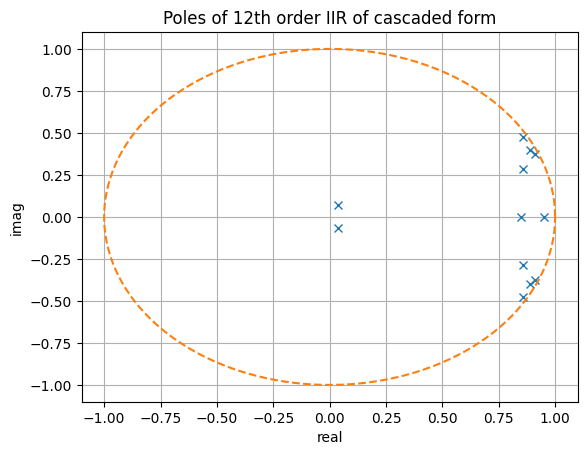

In [137]:
angle = np.linspace(0,2*np.pi,150) 
x_circ = np.cos(angle)
y_circ = np.sin(angle) 

plt.plot(poles2.real,poles2.imag,'x')
plt.plot(x_circ,y_circ,'--')
plt.ylabel('imag')
plt.xlabel('real')
plt.title('Poles of 12th order IIR of cascaded form')
plt.grid()
plt.show()

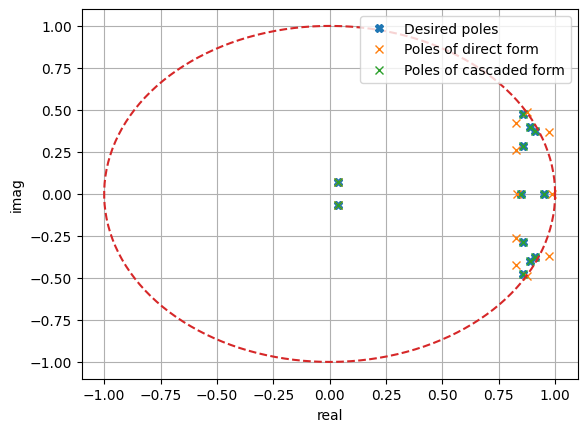

In [138]:
angle = np.linspace(0,2*np.pi,150) 
x_circ = np.cos(angle)
y_circ = np.sin(angle) 

plt.plot(poles.real,poles.imag,'X')
plt.plot(poles1.real,poles1.imag,'x')
plt.plot(poles2.real,poles2.imag,'x')

plt.plot(x_circ,y_circ,'--')
plt.ylabel('imag')
plt.xlabel('real')
plt.legend(['desired poles','poles of direct form','poles of cascaded form'], loc ="upper right")
plt.grid()

plt.show()

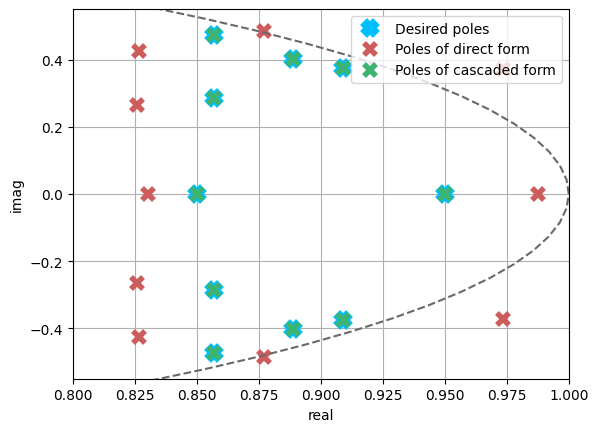

In [139]:
angle = np.linspace(0,2*np.pi,150) 
x_circ = np.cos(angle)
y_circ = np.sin(angle) 

plt.plot(poles.real,poles.imag,'X', mew=4, ms=8,color='deepskyblue')
plt.plot(poles1.real,poles1.imag,'x', mew=4, ms=8,color='indianred')
plt.plot(poles2.real,poles2.imag,'x', mew=4, ms=8,color='mediumseagreen')

plt.plot(x_circ,y_circ,'--',color='dimgray')
plt.ylabel('imag')
plt.xlabel('real')
plt.legend(['desired poles','poles of direct form','poles of cascaded form'], loc ="upper right")
plt.grid()

plt.xlim([0.8,1])
plt.ylim([-0.55,0.55])
plt.show()

In [140]:
omega = np.linspace(-np.pi,np.pi,num=1000)

In [141]:
H = np.ones_like(omega,dtype='F')

for n in range((int)(L/2)):
    H *= 1/((np.exp(1j*omega)-poles[2*n])*((np.exp(1j*omega)-poles[2*n+1])))

In [142]:
H1 = np.ones_like(omega,dtype='F')

for n in range((int)(L/2)):
    H1 *= 1/((np.exp(1j*omega)-poles1[2*n])*((np.exp(1j*omega)-poles1[2*n+1])))

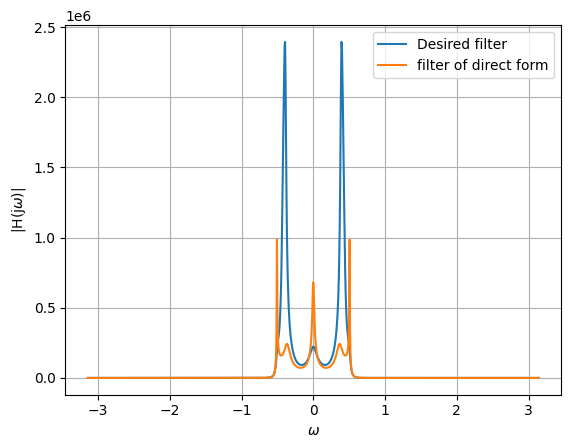

In [143]:
plt.plot(omega,abs(H))
plt.plot(omega,abs(H1))


plt.ylabel('|H(j$\omega$)|')
plt.xlabel('$\omega$')
plt.legend(['desired filter','filter of direct form'], loc ="upper right")

plt.grid()
# plt.ylim([0,1000])

plt.show()